# Rain Prediction of Australia

## Description

- Using a dataset that contains the daily meteorological observations for several Australian climate measurement stations.
- The aim is to predict if it will rain tomorrow through machine learning techinques.
- the target variable corresponds to RainTomorrow which indicates if it rained tomorrow or not.
- variables in datasets are:-
     - temperature,
     - evaporation,
     - wind speed and direction,
     - humidity, 
     - pressure etc.

- For the analysis, sklearn classification algorithms will be used, namely:

  - Logistic Regression Classification 
  - Decision Tree Classification 
  - Random Forest Classification 




## Import Libraries

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import dataset

In [2]:
data = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Documents\\rainfalldataset.csv')

### Getting rid of the columns with objects which will not be used in our model:

In [3]:
data.drop(['Date', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
data.head(5)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.isnull().sum()

Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

In [5]:
data.fillna(data.mean(), inplace=True)

### Now we can change that day and next days'predictions (yes and no) to 1 and 0:

In [6]:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]
data.sample(3)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
138536,Darwin,28.1000,35.700000,0.0,11.200000,8.000000,72.000000,13.000000,31.000000,65.00000,55.000000,1010.700000,1007.300000,2.000000,7.000000,31.800000,34.100000,0,1
15412,Newcastle,12.1864,23.226784,0.0,5.469824,7.624853,39.984292,14.001988,18.637576,68.84381,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0,0
141082,Uluru,8.4000,22.800000,0.0,5.469824,7.624853,33.000000,20.000000,15.000000,67.00000,34.000000,1018.000000,1015.200000,4.437189,4.503167,13.600000,22.300000,0,0


## Data Visualisation

Text(0.5, 0.98, 'Sunshine od Location')

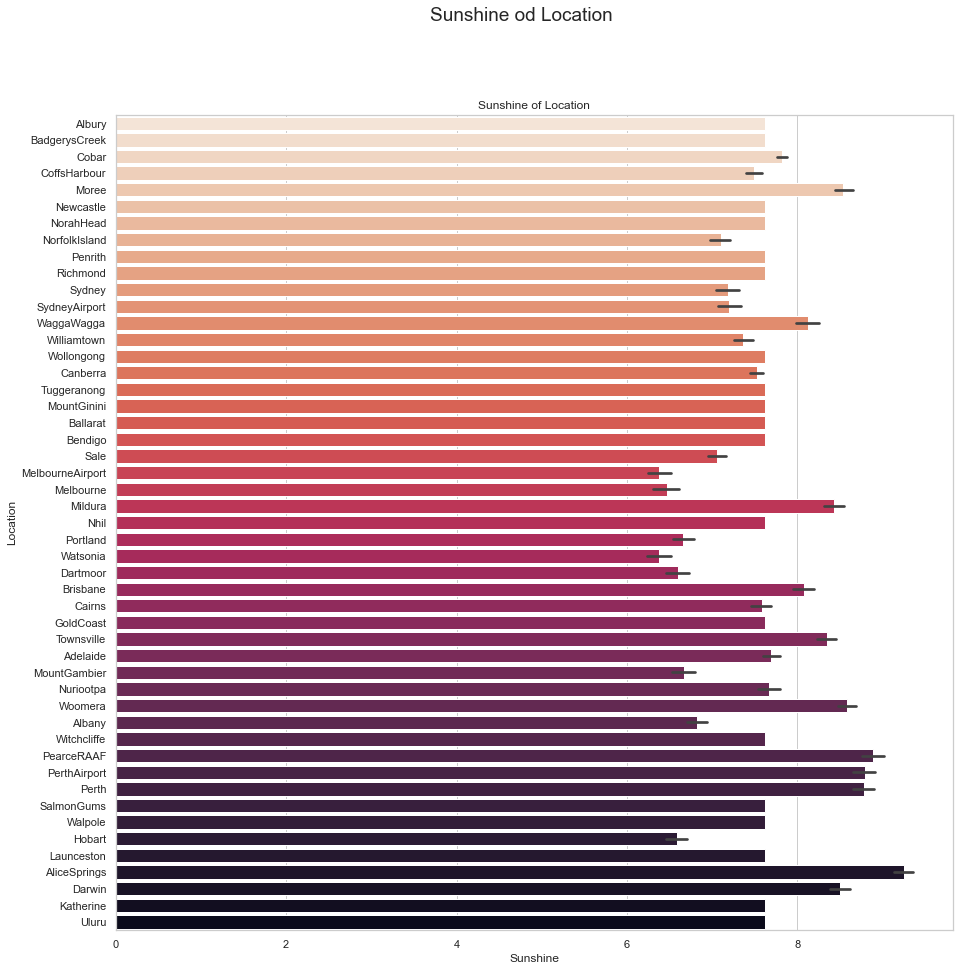

In [7]:
sns.set(style='whitegrid')
plt.figure(2, figsize=(15,15))
plt.subplot(  title='Sunshine of Location')
sns.barplot(x='Sunshine',y='Location', data=data, palette='rocket_r')
plt.suptitle('Sunshine od Location', fontsize=19)

Text(0.5, 0.98, 'Location-Wise Rainfall')

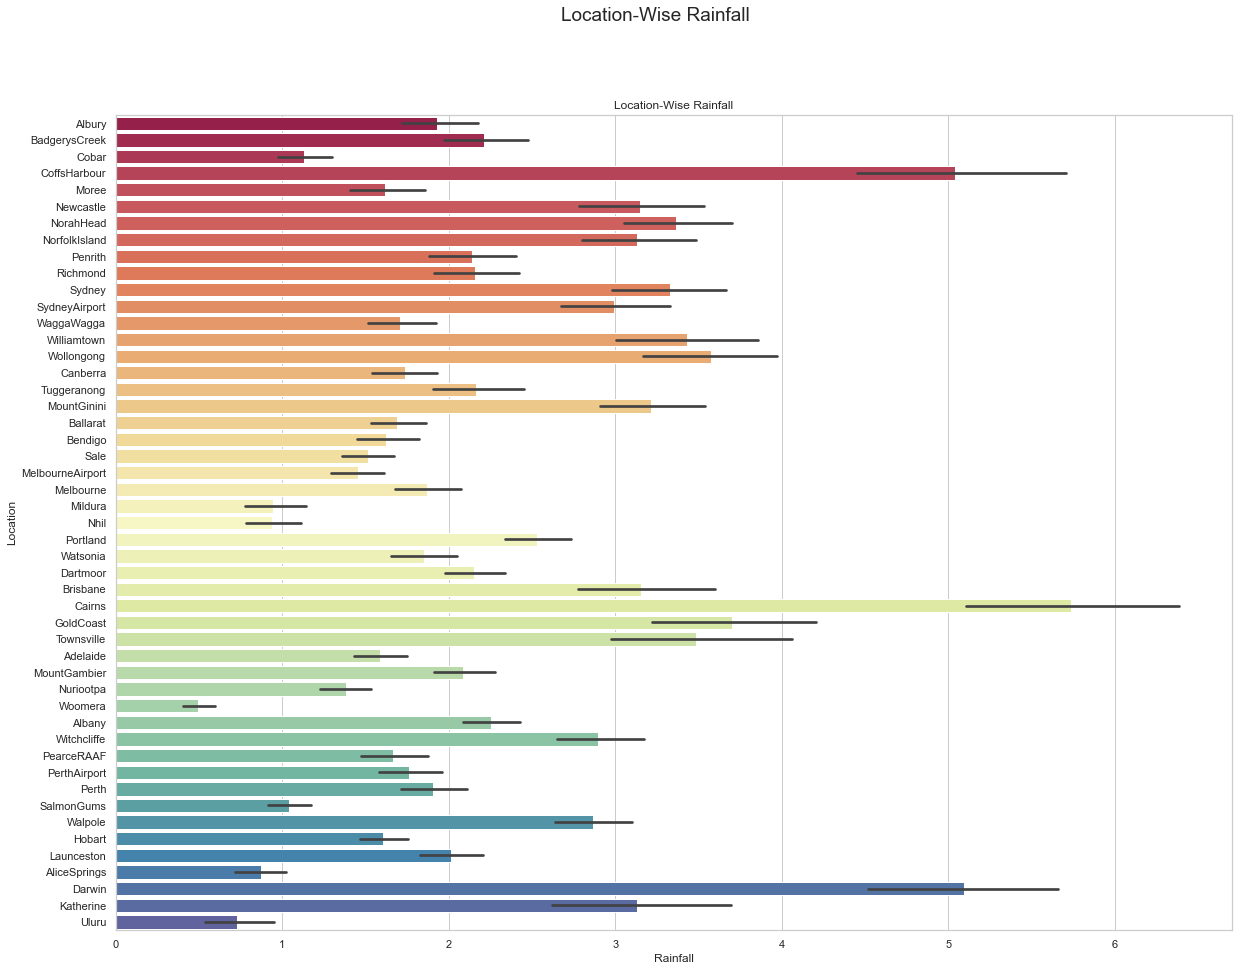

In [8]:
sns.set(style='whitegrid')
#sns.set_color_codes("Spectral")
plt.figure(2, figsize=(20,15))
plt.subplot(  title='Location-Wise Rainfall')
sns.barplot(x='Rainfall',y='Location', data=data, palette='Spectral')
plt.suptitle('Location-Wise Rainfall', fontsize=19)

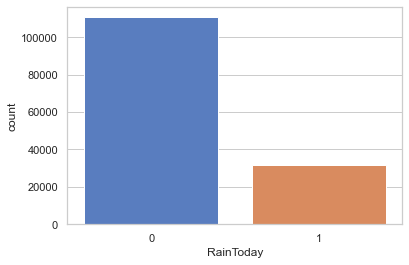

In [9]:
data.RainTomorrow.value_counts()
sns.countplot(x='RainToday',data = data, palette = 'muted')

Text(0, 0.5, 'MaxTemp')

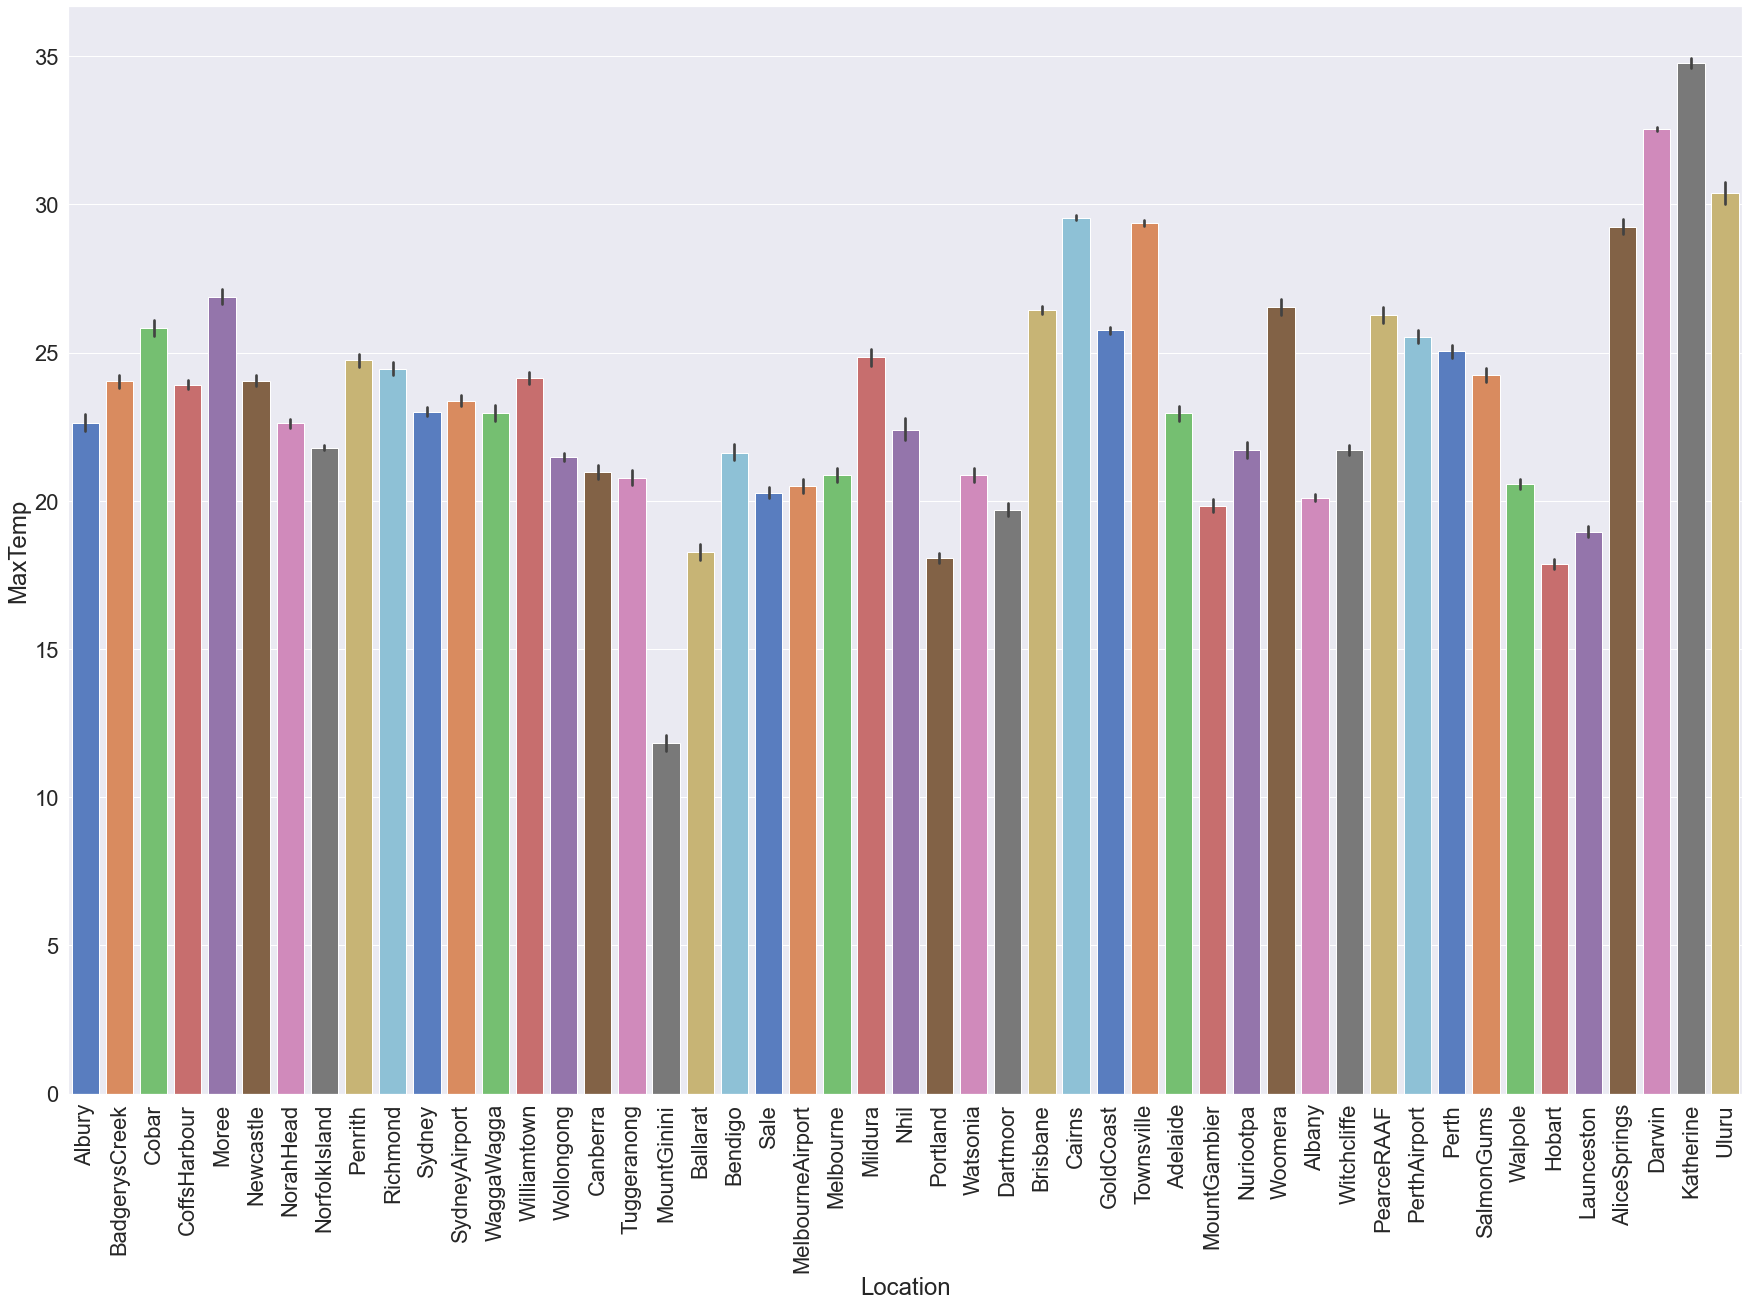

In [10]:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
bax=sns.barplot(x=data["Location"],y=data["MaxTemp"].values,palette="muted")
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)
plt.ylabel('MaxTemp')

Text(0, 0.5, 'MinTemp')

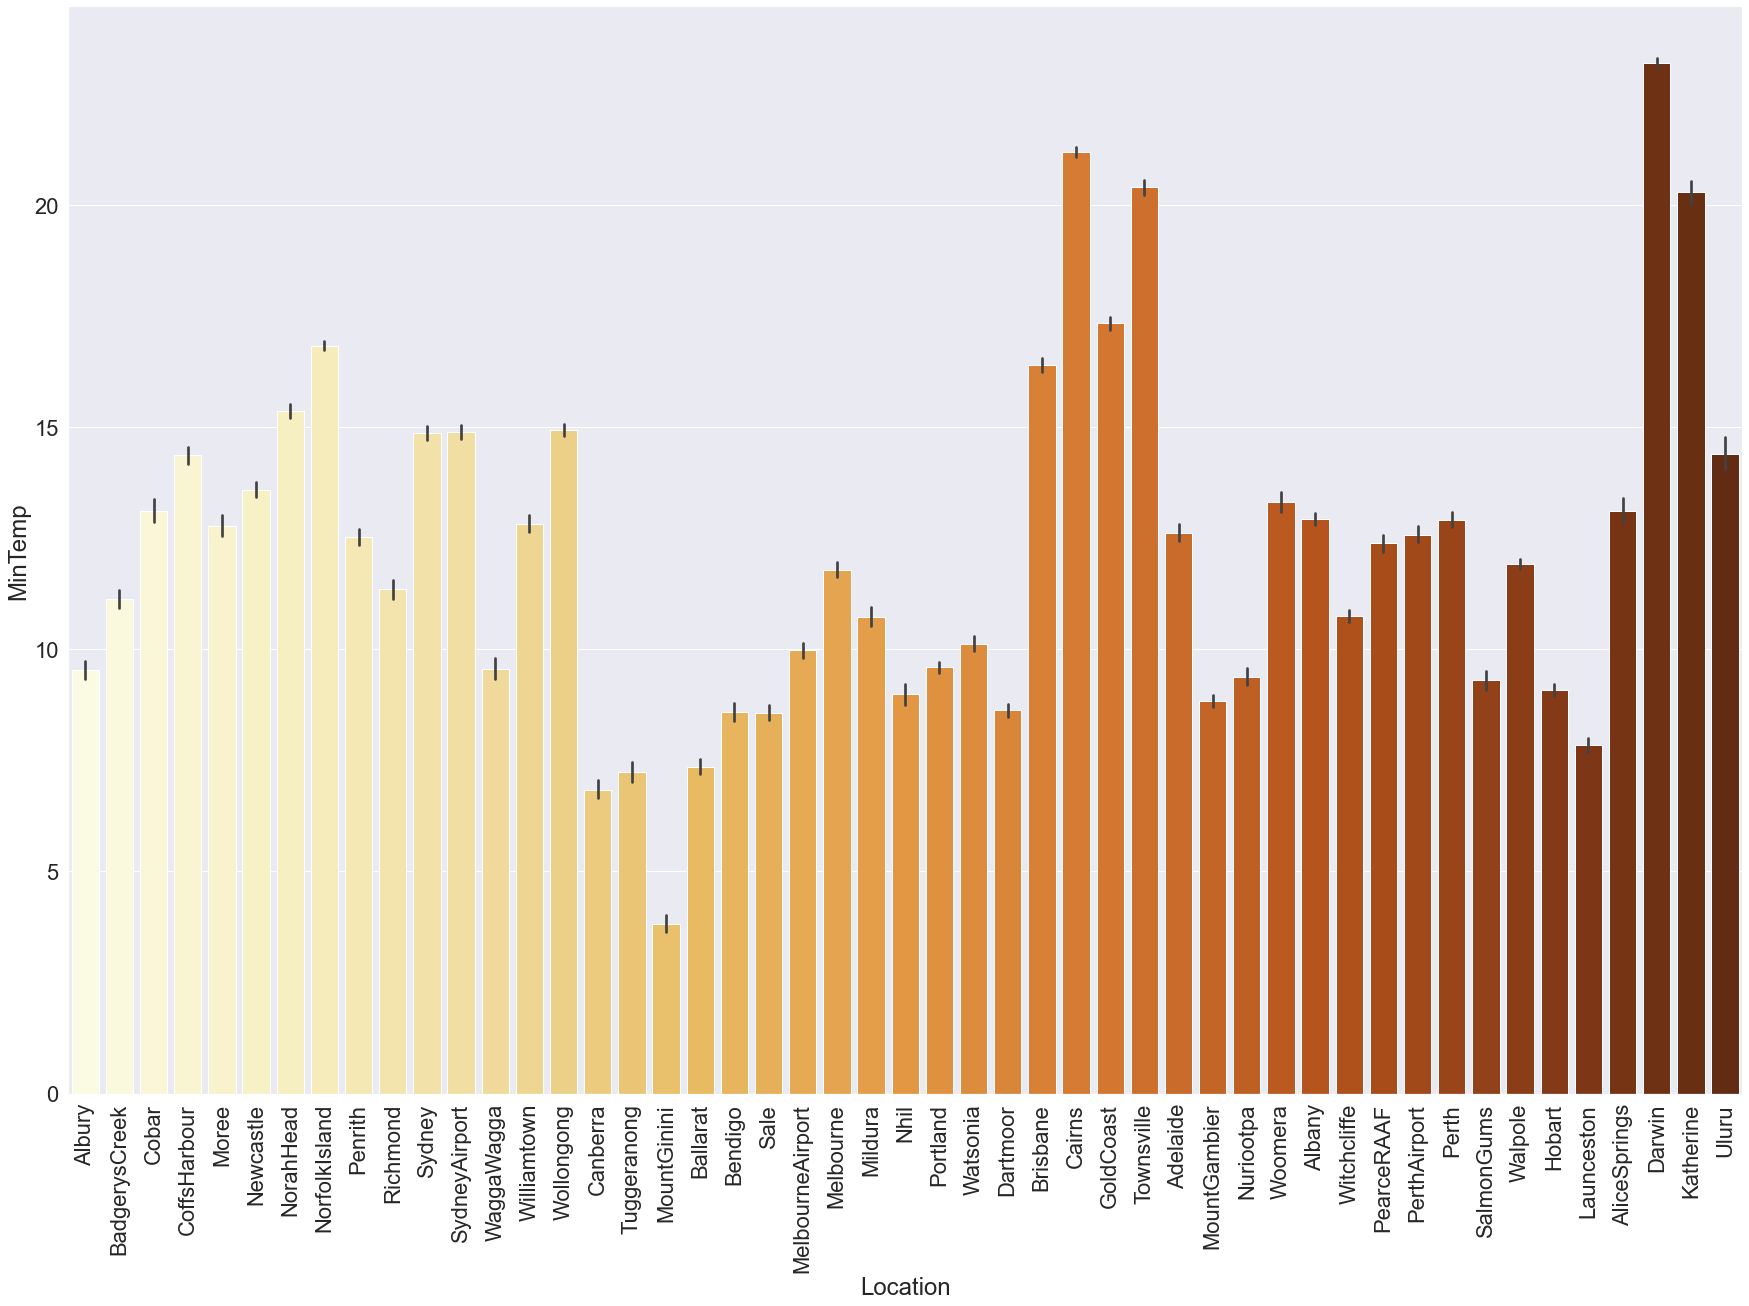

In [11]:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
bax=sns.barplot(x=data["Location"],y=data["MinTemp"].values,palette="YlOrBr")
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)
plt.ylabel('MinTemp')

Text(0.5, 0.98, 'Rain Today Location Wise')

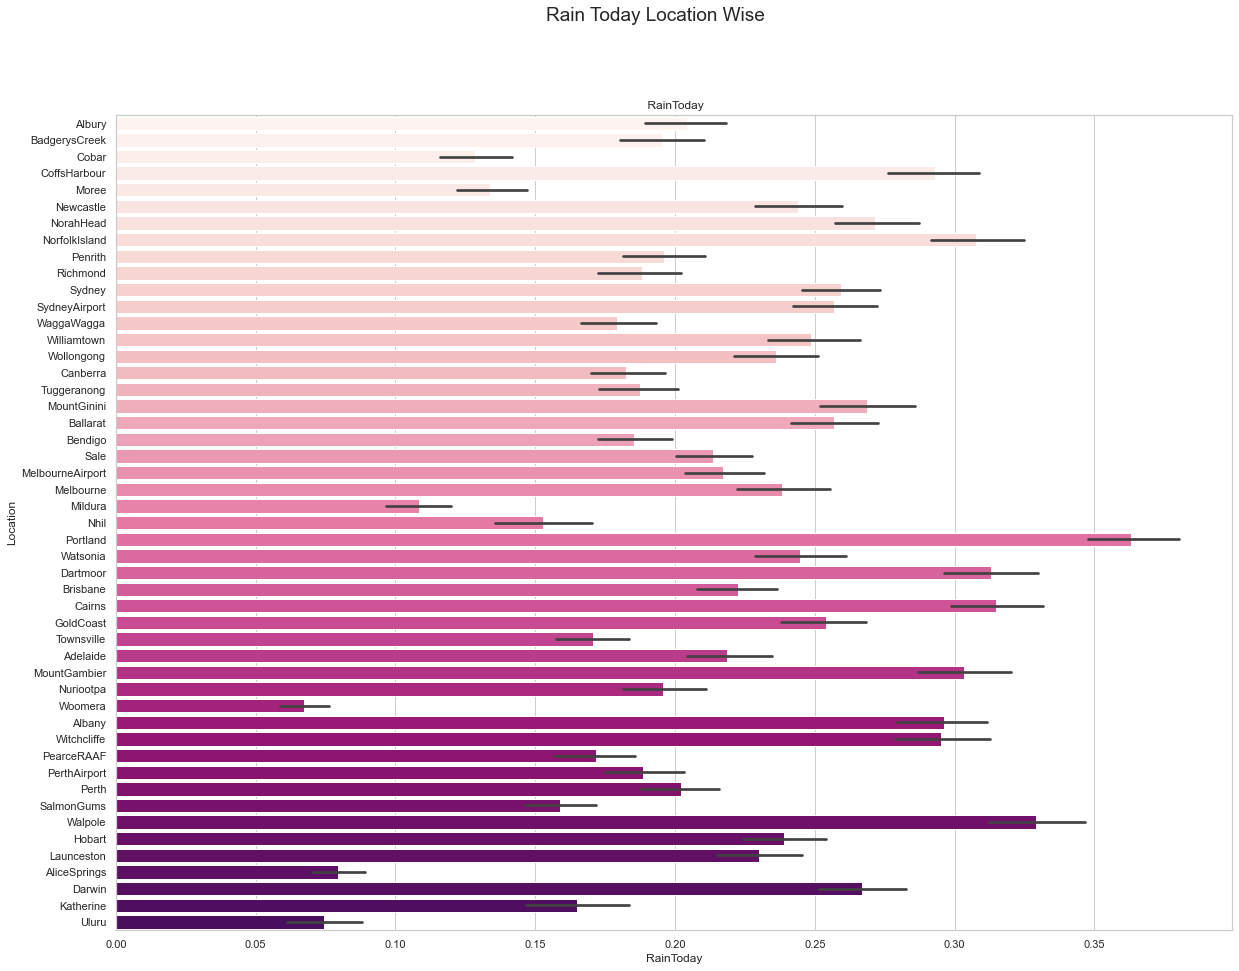

In [12]:
sns.set(style='whitegrid')
#sns.set_color_codes("Spectral")
plt.figure(2, figsize=(20,15))
plt.subplot(  title=' RainToday')
sns.barplot(x='RainToday',y='Location', data=data, palette='RdPu')
plt.suptitle('Rain Today Location Wise', fontsize=19)

Text(0.5, 0.98, 'Rain Tomorrow Location Wise')

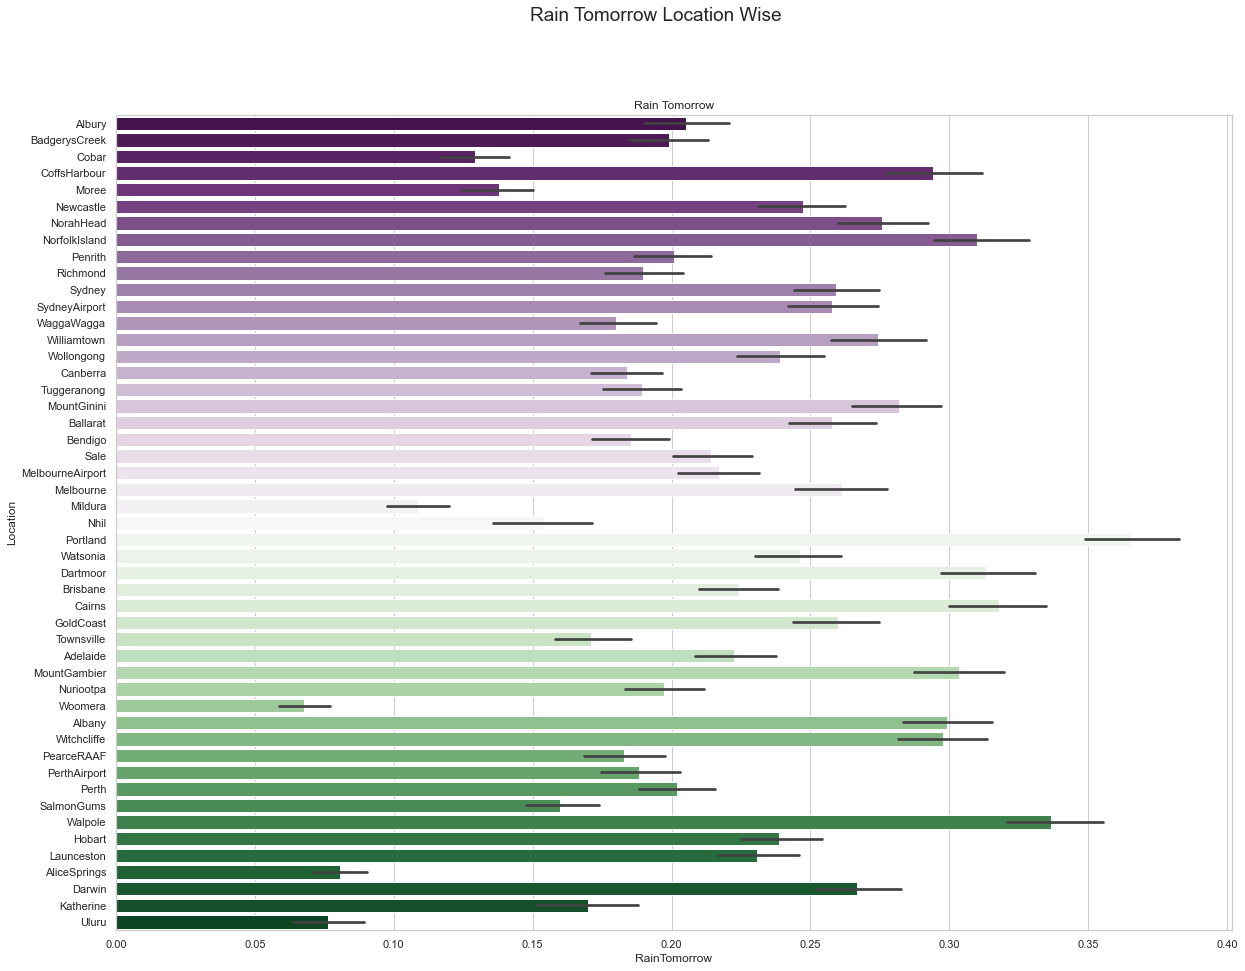

In [13]:
sns.set(style='whitegrid')
#sns.set_color_codes("Spectral")
plt.figure(2, figsize=(20,15))
plt.subplot(  title='Rain Tomorrow')
sns.barplot(x='RainTomorrow',y='Location', data=data, palette='PRGn')
plt.suptitle('Rain Tomorrow Location Wise', fontsize=19)

Text(0, 0.5, 'Evaporation')

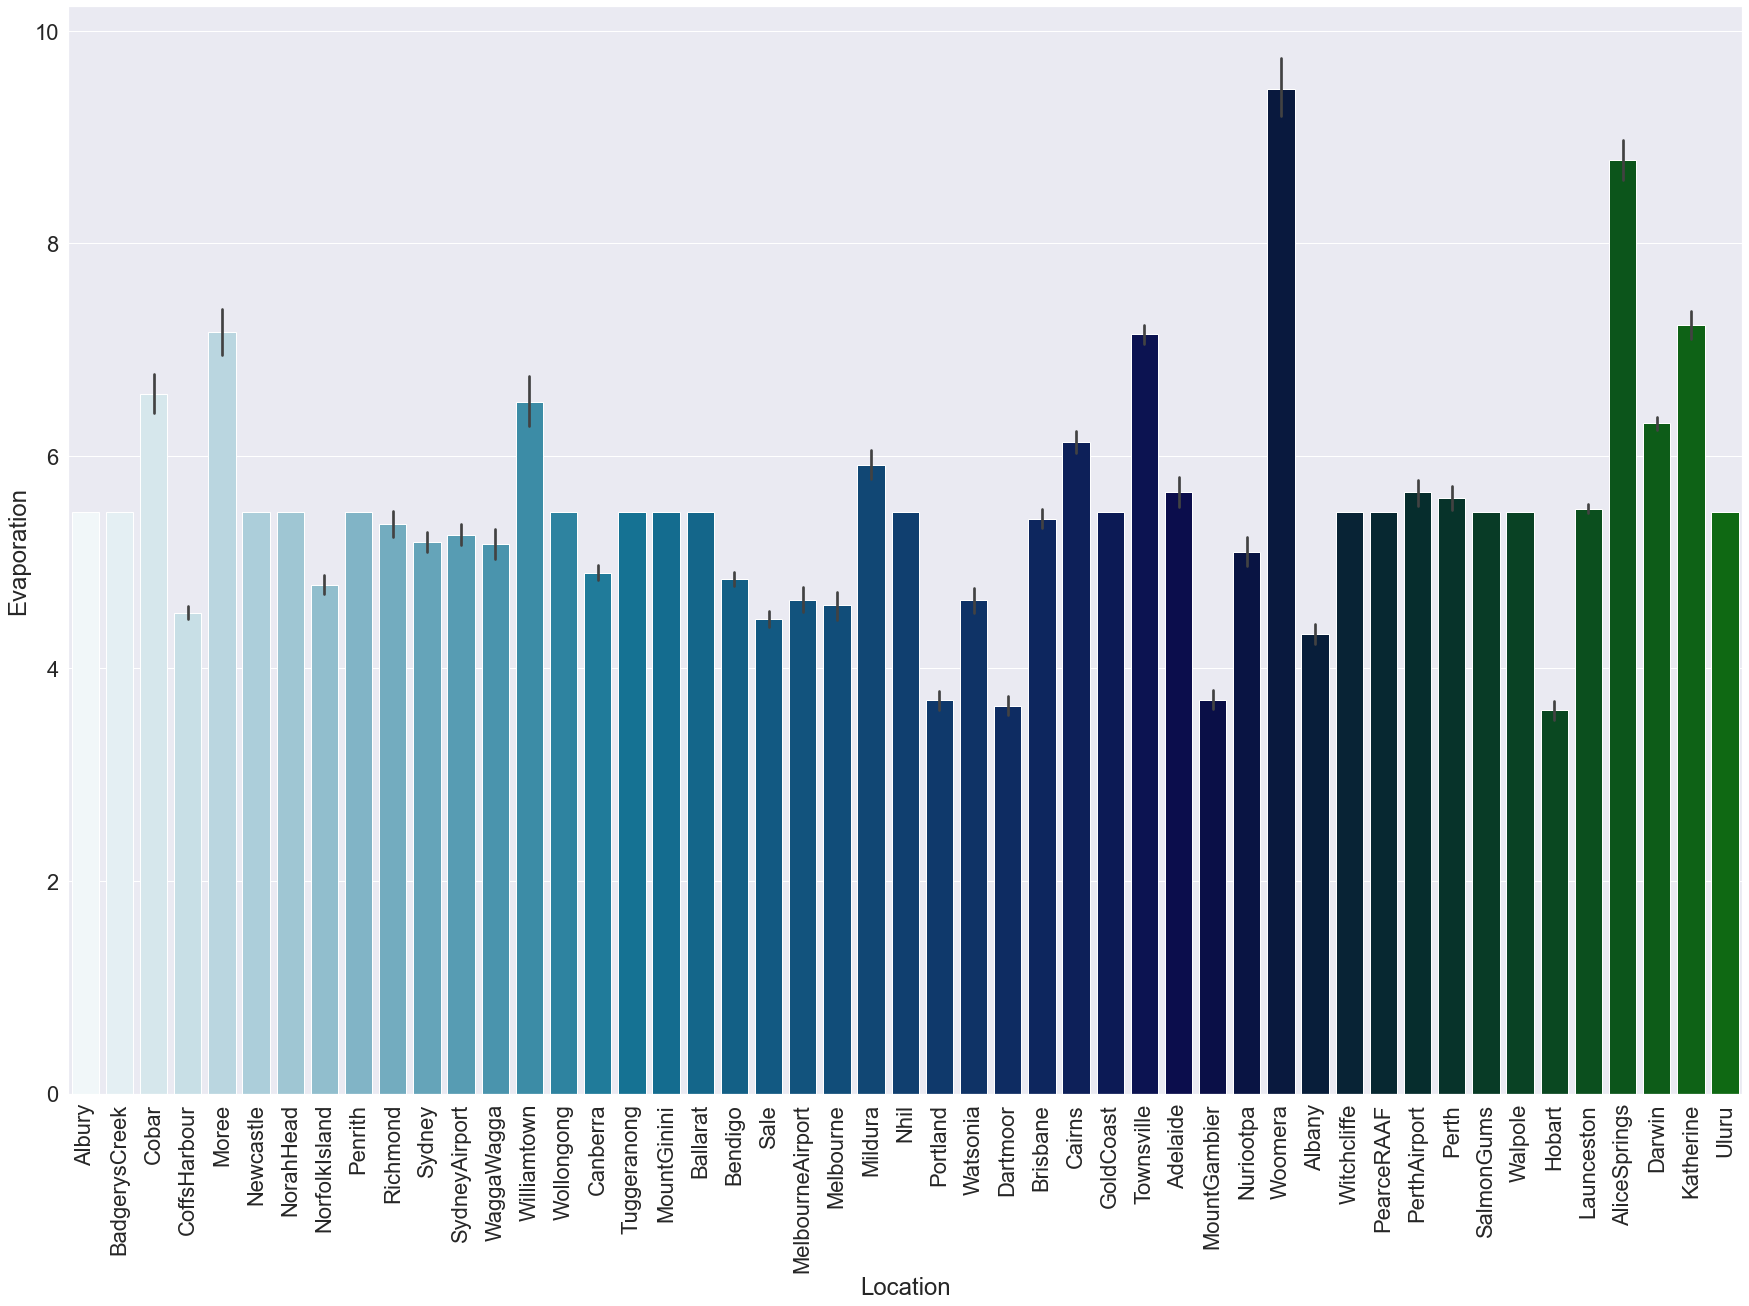

In [14]:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(style="whitegrid")
bax=sns.barplot(x=data["Location"],y=data["Evaporation"].values,palette="ocean_r")
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)
plt.ylabel('Evaporation')

[Text(0, 0, 'Albury'),
 Text(0, 0, 'BadgerysCreek'),
 Text(0, 0, 'Cobar'),
 Text(0, 0, 'CoffsHarbour'),
 Text(0, 0, 'Moree'),
 Text(0, 0, 'Newcastle'),
 Text(0, 0, 'NorahHead'),
 Text(0, 0, 'NorfolkIsland'),
 Text(0, 0, 'Penrith'),
 Text(0, 0, 'Richmond'),
 Text(0, 0, 'Sydney'),
 Text(0, 0, 'SydneyAirport'),
 Text(0, 0, 'WaggaWagga'),
 Text(0, 0, 'Williamtown'),
 Text(0, 0, 'Wollongong'),
 Text(0, 0, 'Canberra'),
 Text(0, 0, 'Tuggeranong'),
 Text(0, 0, 'MountGinini'),
 Text(0, 0, 'Ballarat'),
 Text(0, 0, 'Bendigo'),
 Text(0, 0, 'Sale'),
 Text(0, 0, 'MelbourneAirport'),
 Text(0, 0, 'Melbourne'),
 Text(0, 0, 'Mildura'),
 Text(0, 0, 'Nhil'),
 Text(0, 0, 'Portland'),
 Text(0, 0, 'Watsonia'),
 Text(0, 0, 'Dartmoor'),
 Text(0, 0, 'Brisbane'),
 Text(0, 0, 'Cairns'),
 Text(0, 0, 'GoldCoast'),
 Text(0, 0, 'Townsville'),
 Text(0, 0, 'Adelaide'),
 Text(0, 0, 'MountGambier'),
 Text(0, 0, 'Nuriootpa'),
 Text(0, 0, 'Woomera'),
 Text(0, 0, 'Albany'),
 Text(0, 0, 'Witchcliffe'),
 Text(0, 0, 'PearceRAA

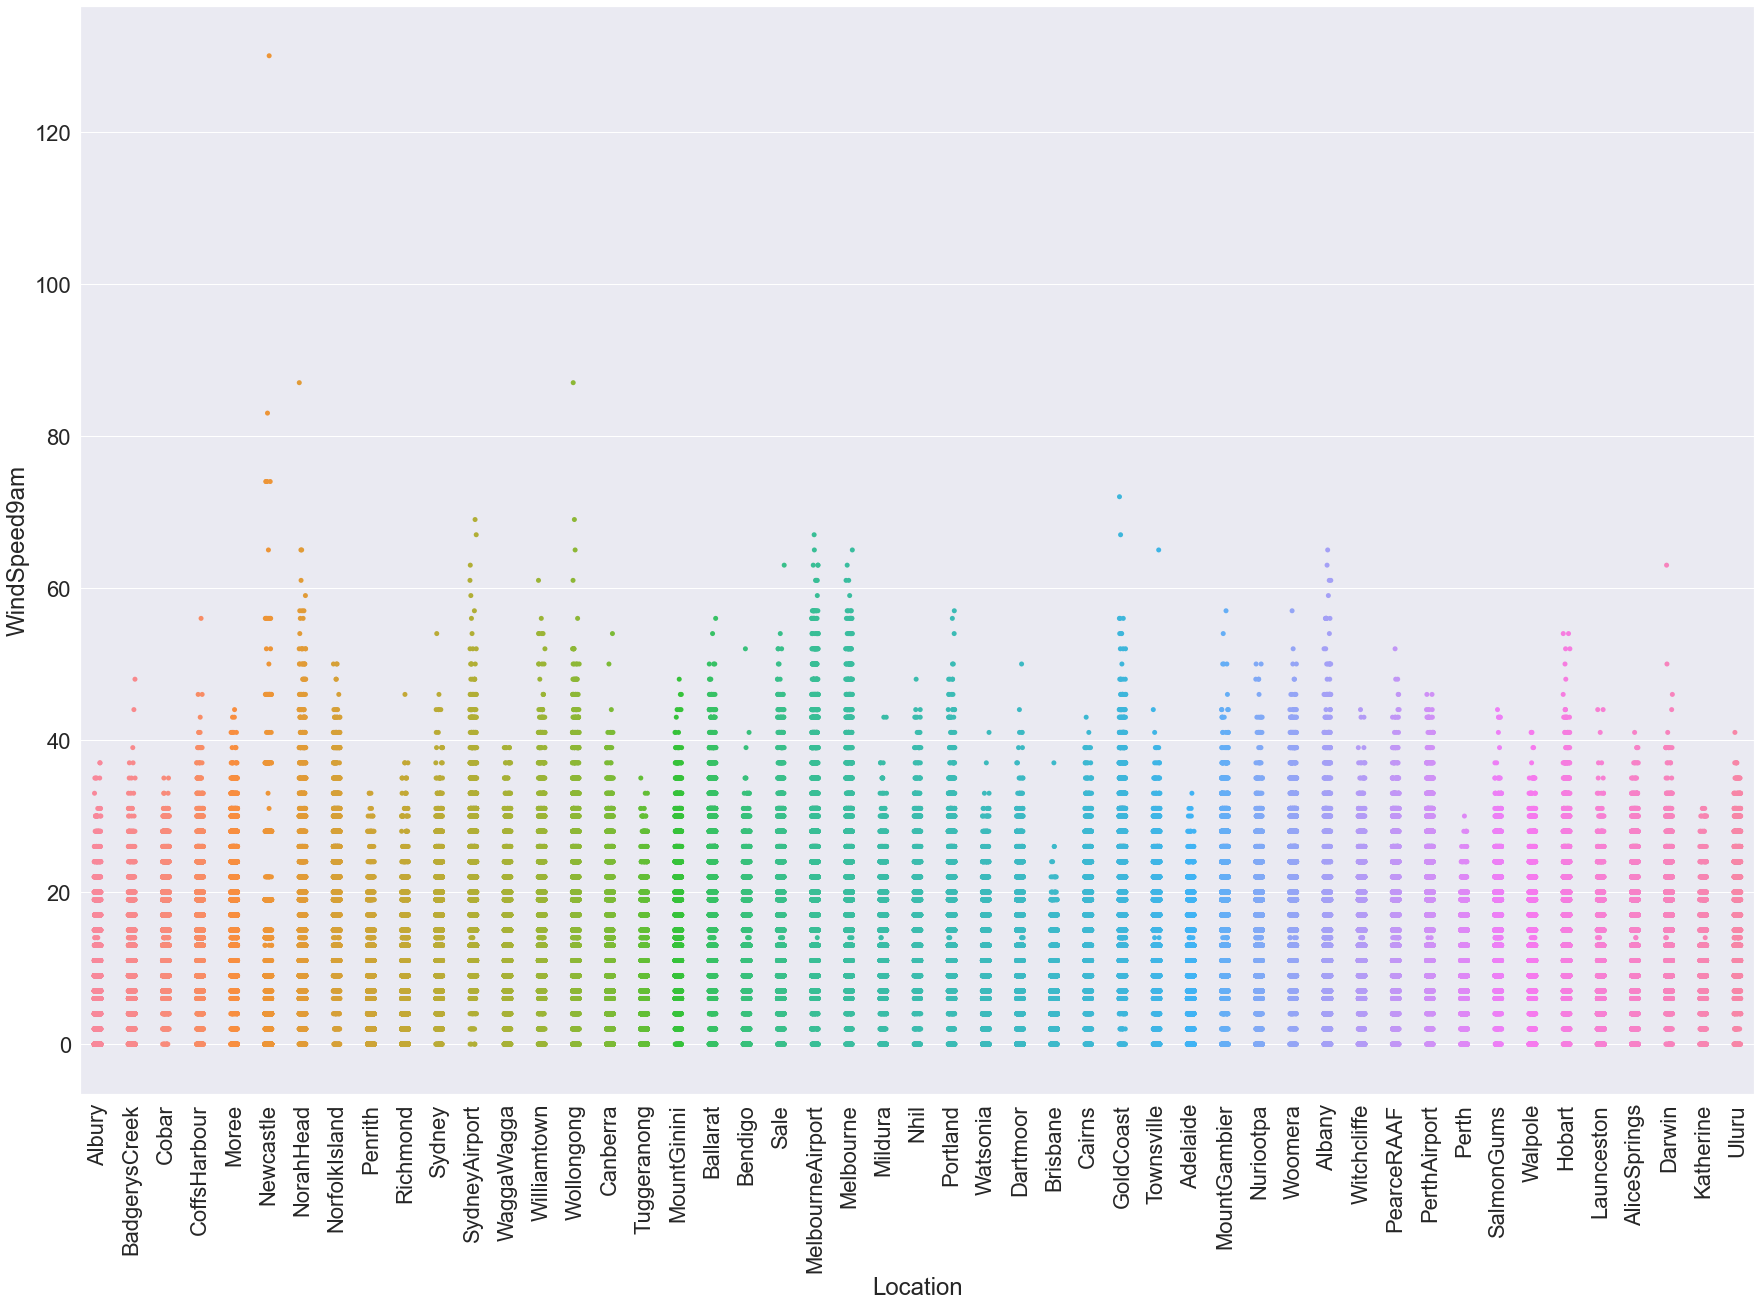

In [15]:
# Set the palette using the name of a palette:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_palette("Paired")

# Plot a chart:
bax=sns.stripplot(x="Location", y="WindSpeed9am", data=data)
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)

[Text(0, 0, 'Albury'),
 Text(0, 0, 'BadgerysCreek'),
 Text(0, 0, 'Cobar'),
 Text(0, 0, 'CoffsHarbour'),
 Text(0, 0, 'Moree'),
 Text(0, 0, 'Newcastle'),
 Text(0, 0, 'NorahHead'),
 Text(0, 0, 'NorfolkIsland'),
 Text(0, 0, 'Penrith'),
 Text(0, 0, 'Richmond'),
 Text(0, 0, 'Sydney'),
 Text(0, 0, 'SydneyAirport'),
 Text(0, 0, 'WaggaWagga'),
 Text(0, 0, 'Williamtown'),
 Text(0, 0, 'Wollongong'),
 Text(0, 0, 'Canberra'),
 Text(0, 0, 'Tuggeranong'),
 Text(0, 0, 'MountGinini'),
 Text(0, 0, 'Ballarat'),
 Text(0, 0, 'Bendigo'),
 Text(0, 0, 'Sale'),
 Text(0, 0, 'MelbourneAirport'),
 Text(0, 0, 'Melbourne'),
 Text(0, 0, 'Mildura'),
 Text(0, 0, 'Nhil'),
 Text(0, 0, 'Portland'),
 Text(0, 0, 'Watsonia'),
 Text(0, 0, 'Dartmoor'),
 Text(0, 0, 'Brisbane'),
 Text(0, 0, 'Cairns'),
 Text(0, 0, 'GoldCoast'),
 Text(0, 0, 'Townsville'),
 Text(0, 0, 'Adelaide'),
 Text(0, 0, 'MountGambier'),
 Text(0, 0, 'Nuriootpa'),
 Text(0, 0, 'Woomera'),
 Text(0, 0, 'Albany'),
 Text(0, 0, 'Witchcliffe'),
 Text(0, 0, 'PearceRAA

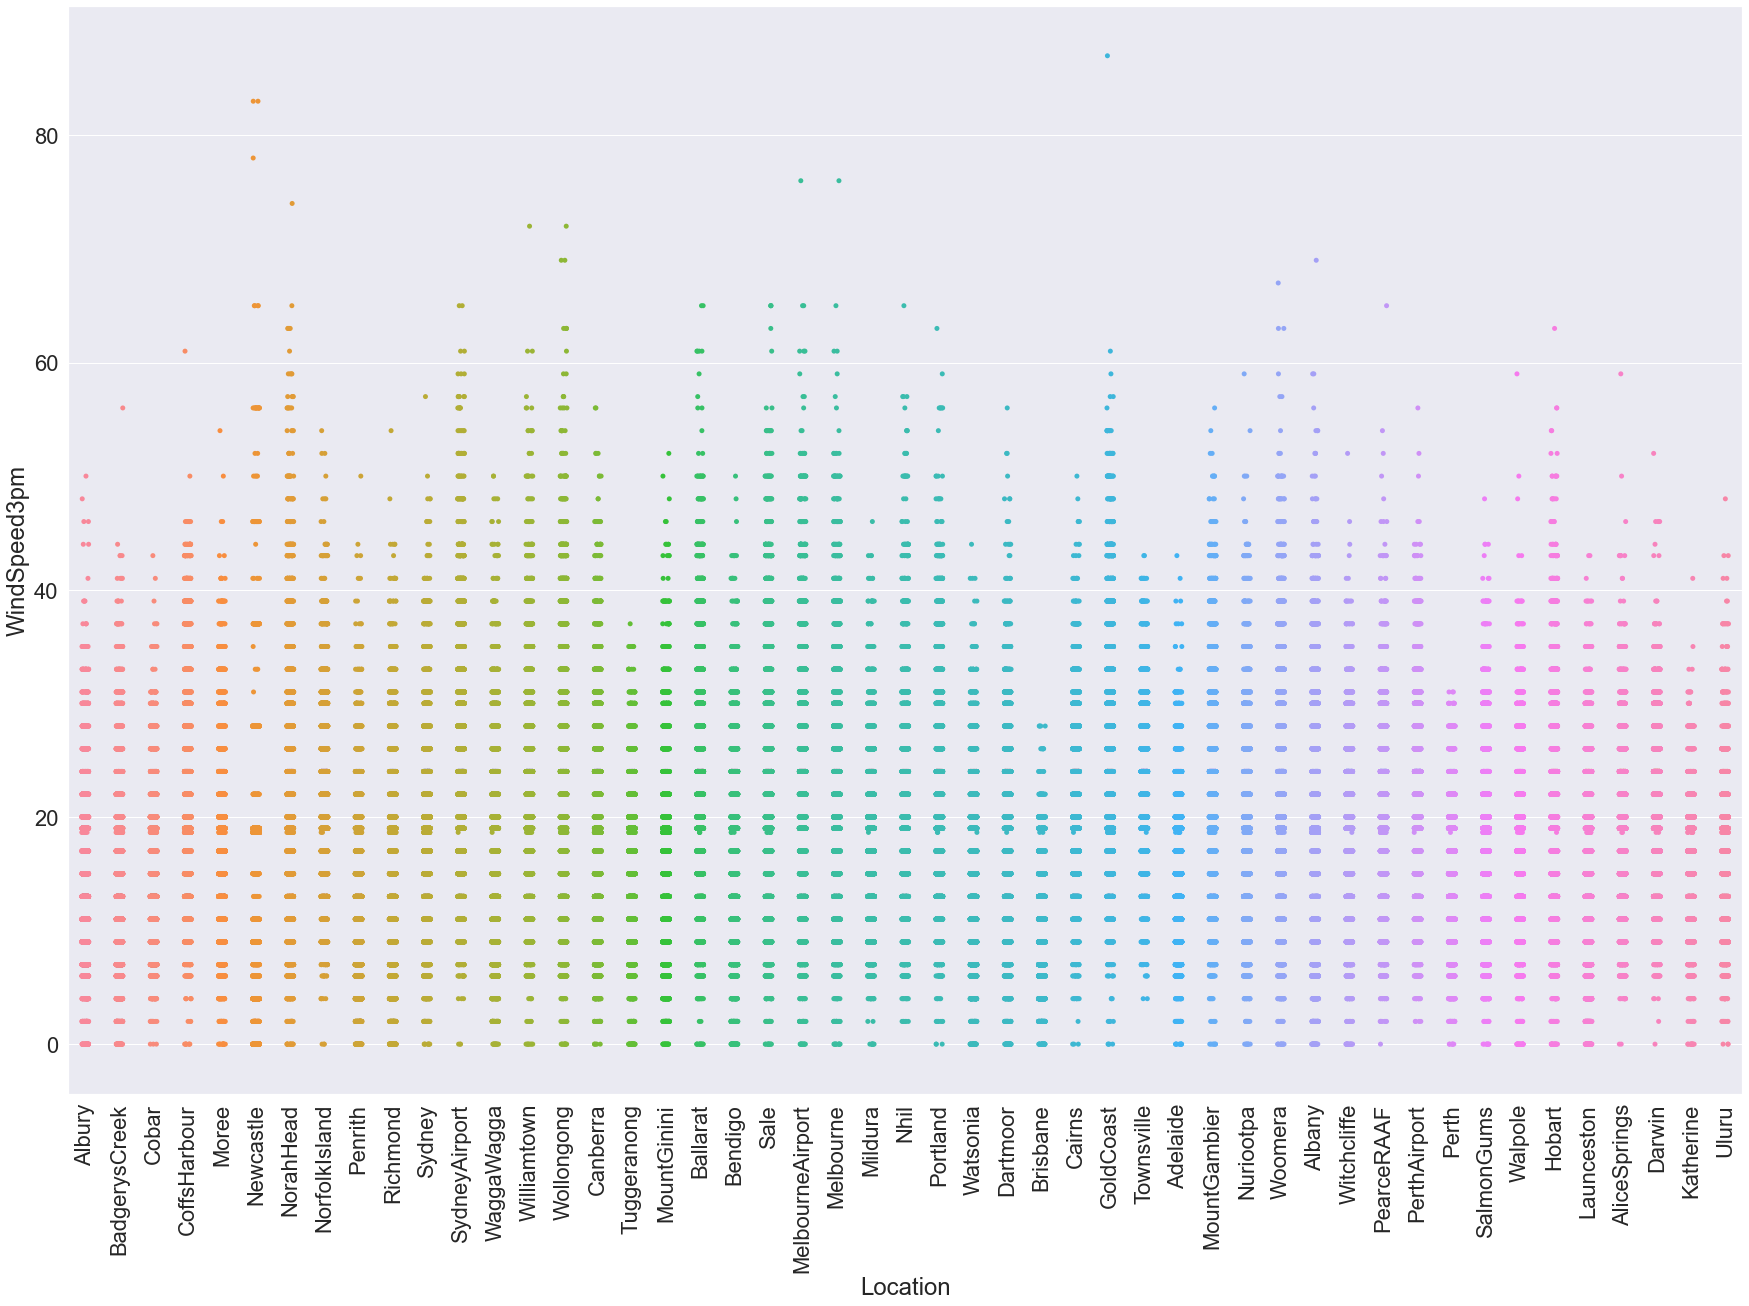

In [16]:
# Set the palette using the name of a palette:
sns.set(font_scale=2)
fig_dims = (30, 20)
fig, ax = plt.subplots(figsize=fig_dims)
sns.color_palette("pastel")

# Plot a chart:
bax=sns.stripplot(x="Location", y="WindSpeed3pm", data=data)
bax.set_xticklabels(bax.get_xticklabels(), rotation=90)

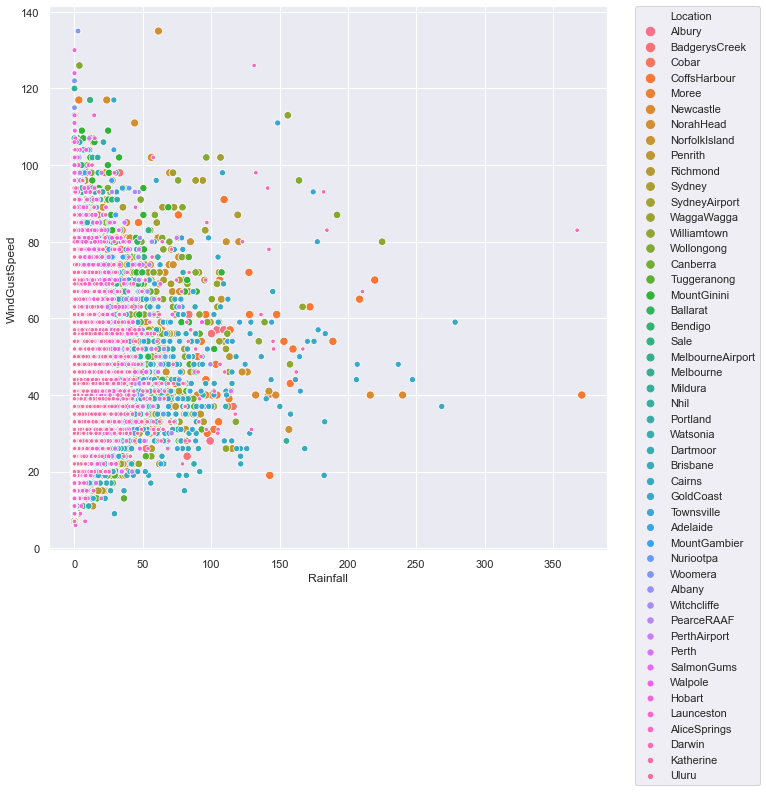

In [17]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Rainfall", y="WindGustSpeed",
                      hue="Location", size="Location",
                      data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

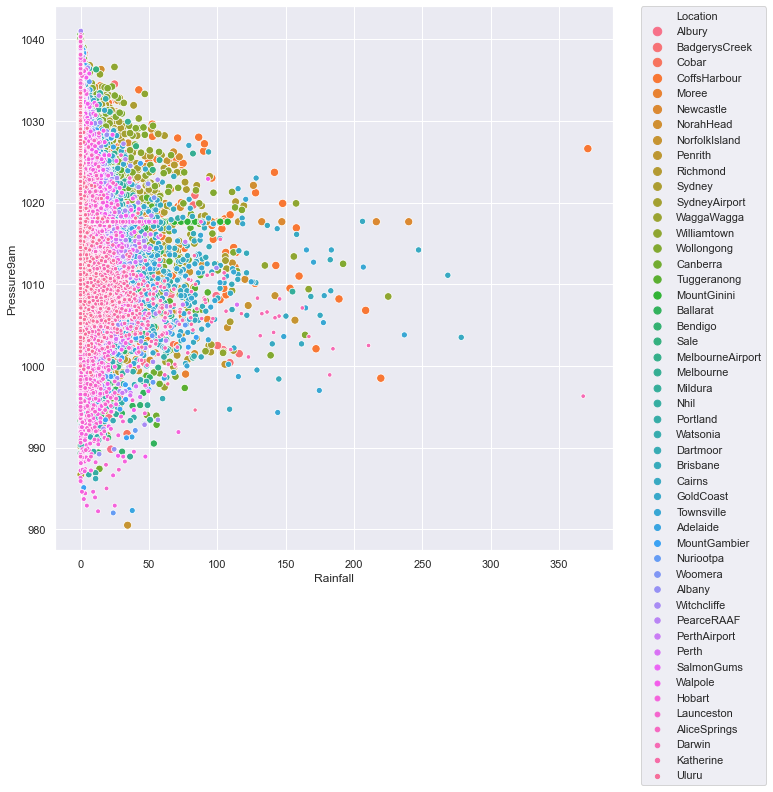

In [18]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Rainfall", y="Pressure9am",
                      hue="Location", size="Location",
                      data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

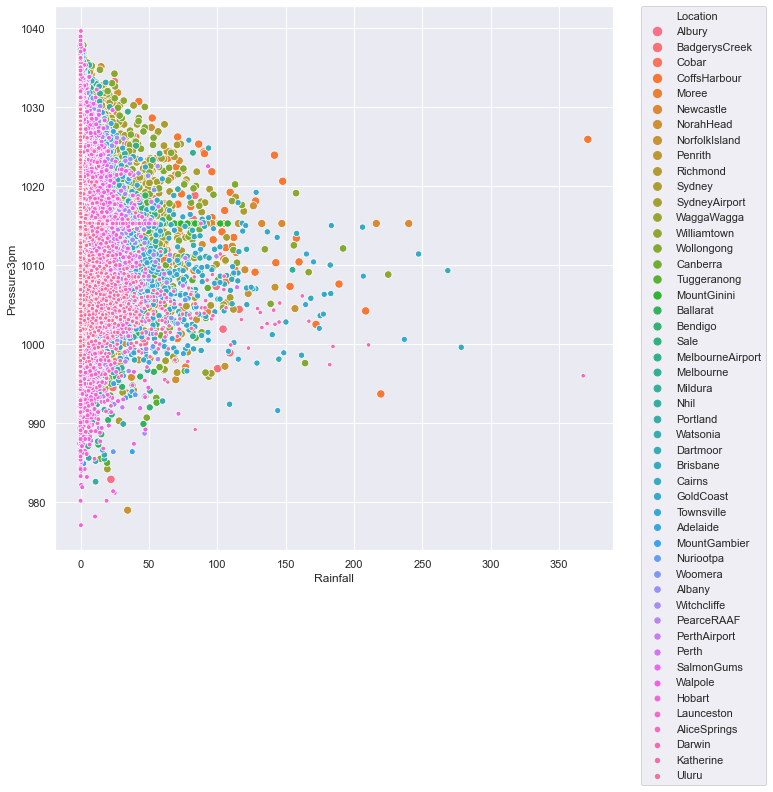

In [19]:
sns.set(font_scale=1)
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.scatterplot(x="Rainfall", y="Pressure3pm",
                      hue="Location", size="Location",
                      data=data)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

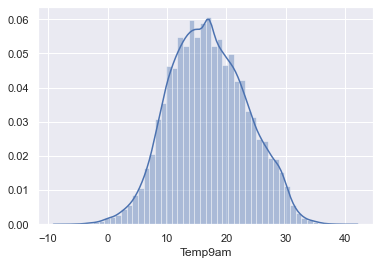

In [20]:
sns.distplot(data.Temp9am)

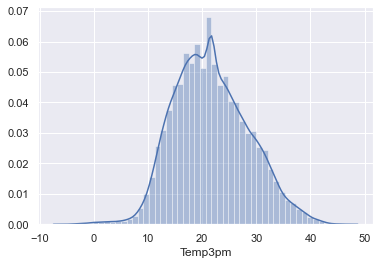

In [21]:
sns.distplot(data.Temp3pm)

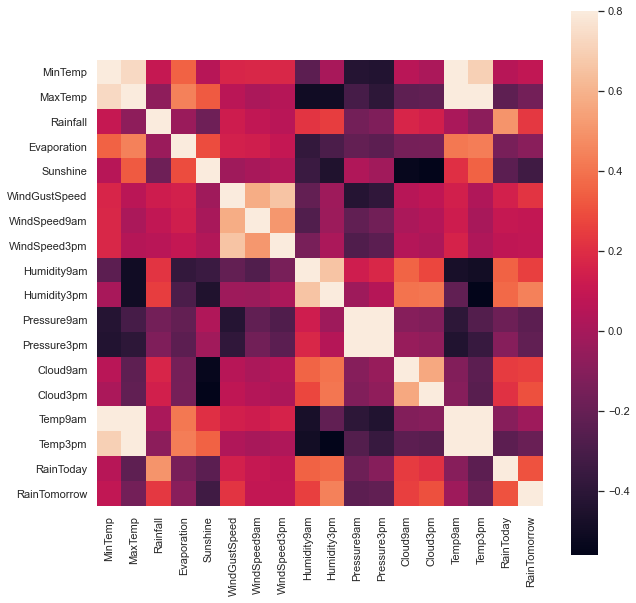

In [22]:
corrmat = data.corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True)

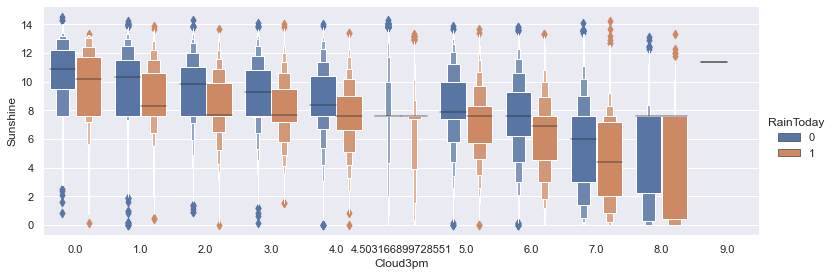

In [23]:
sns.catplot(x="Cloud3pm", y="Sunshine", data=data, kind="boxen",height=4, aspect=2.7, hue = "RainToday")

## Import dataset

In [24]:
data = pd.read_csv('C:\\Users\\Lenovo\\OneDrive\\Documents\\rainfalldataset.csv')
data.sample(3)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
91083,18-08-2009,Townsville,13.6,27.1,0.0,6.4,10.7,ENE,37.0,SE,...,54.0,1021.1,1018.0,1.0,1.0,23.6,25.9,No,0.0,No
11934,24-02-2009,Moree,19.6,32.4,0.0,7.4,11.6,NNE,30.0,NNE,...,39.0,1016.7,1014.0,1.0,3.0,23.3,30.9,No,0.0,No
116674,28-08-2014,PerthAirport,10.5,25.3,0.0,4.2,5.9,NW,43.0,NNE,...,33.0,1017.1,1014.6,7.0,7.0,15.1,23.3,No,0.0,No


###  Getting rid of the columns with objects which will not be used in our model:

In [25]:
data.drop(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RISK_MM'], axis=1, inplace=True)
data.head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


### Check Null Values

In [26]:
data.isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

### Now we can change that day and next days'predictions (yes and no) to 1 and 0:

In [27]:
# Now we can change that day and next days'predictions (yes and no) to 1 and 0:
data.RainToday = [1 if each == 'Yes' else 0 for each in data.RainToday]
data.RainTomorrow = [1 if each == 'Yes' else 0 for each in data.RainTomorrow]


In [28]:
data.fillna(data.mean(), inplace=True)
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,13.4,22.9,0.6,5.469824,7.624853,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,0,0
1,7.4,25.1,0.0,5.469824,7.624853,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,0,0
2,12.9,25.7,0.0,5.469824,7.624853,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,0,0
3,9.2,28.0,0.0,5.469824,7.624853,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,0,0
4,17.5,32.3,1.0,5.469824,7.624853,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142188,3.5,21.8,0.0,5.469824,7.624853,31.0,15.0,13.0,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,0,0
142189,2.8,23.4,0.0,5.469824,7.624853,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,0,0
142190,3.6,25.3,0.0,5.469824,7.624853,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,0,0
142191,5.4,26.9,0.0,5.469824,7.624853,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,0,0


## Data Analysis

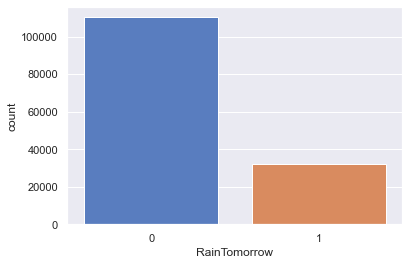

In [29]:
data.RainTomorrow.value_counts()
sns.countplot(x='RainTomorrow',data = data, palette = 'muted')

### Taking Dependent and Independent

In [30]:
X = data.iloc[:,:-1].values   # excluded RainTomorrow's Column
y = data.iloc[:,-1:].values  # target variable as RainTomorrow's Column

### Normalization Progress
- Normalization formula = (x - min(x)) / (max(x) - min(x))
- In order to scale all the features between 0 and 1:


In [31]:
X = ((X) - np.min(X)) / (np.max(X) - np.min(X))

### Split Data for training and testing
- For all the experiments we used 80:20 training and test ratio.
  - Logistic Regression Classification 
  - Decision Tree Classification 
  - Random Forest Classification


In [32]:
from sklearn.model_selection import train_test_split  
X_train,X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [33]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', y_test.shape)

X train shape:  (113754, 17)
Y train shape:  (113754, 1)
X test shape:  (28439, 17)
Y test shape:  (28439, 1)


### plotting graph

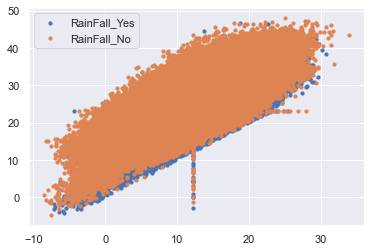

In [34]:

RainFall_Yes = data.loc[y == 1]


RainFall_No = data.loc[y == 0]

# plots
plt.scatter(RainFall_Yes.iloc[:, 0], RainFall_Yes.iloc[:, 1], s=10, label='RainFall_Yes')
plt.scatter(RainFall_No.iloc[:, 0], RainFall_No.iloc[:, 1], s=10, label='RainFall_No')
plt.legend()
plt.show()

# Implementing different Algorithms


## 1. Logistic Regression Model

In [35]:
from sklearn.linear_model import LogisticRegression  
import time
from sklearn.metrics import accuracy_score
t0=time.time()
classifier= LogisticRegression(random_state=0) 
#Fitting Logistic Regression to the training set  
classifier.fit(X_train, y_train) 

C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=0)

### Predicting the test set result  

In [36]:
y_pred= classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

### Display actual and predicted values side by side


In [37]:
df = pd.DataFrame(data=y_test, columns=['y_test'])
df['y_predict'] = y_pred
df

,y_test,y_predict
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
28434,0,0
28435,0,0
28436,0,0
28437,0,0


### Calculating the Accuracy and time taken score of LR

In [38]:
Logistic_regression = accuracy_score(y_test,y_pred)
LR_time = time.time()-t0
print('Logistic Regression Accuracy :', Logistic_regression)
print('Logistic Regression Time taken :' , LR_time)

Logistic Regression Accuracy : 0.8377931713492036
Logistic Regression Time taken : 3.036402940750122


In [39]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import plot_confusion_matrix

In [40]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)

### ROC curve

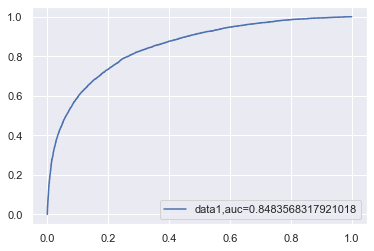

In [41]:
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr,tpr,_ = metrics.roc_curve(y_test,y_pred_proba)
auc = metrics.roc_auc_score(y_test,y_pred_proba)
plt.plot(fpr,tpr,label = "data1,auc="+str(auc))
plt.legend(loc =4)
plt.show()

## Confusion Metrics

In [42]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix                            
cm= confusion_matrix(y_test,y_pred) 
cm

array([[21353,   714],
       [ 3899,  2473]], dtype=int64)

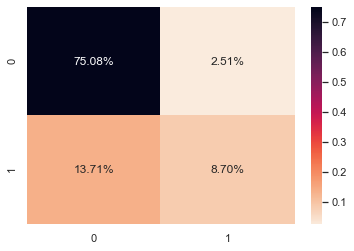

In [43]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='rocket_r')

## 2. Decision Tree Classification Model

In [44]:
from sklearn.tree import DecisionTreeClassifier
t0=time.time()
destree=DecisionTreeClassifier(random_state=0)
destree.fit(X_train,y_train)
y_predi=destree.predict(X_test)
Decision_Tree = accuracy_score(y_test,y_pred)
DT_time = time.time()-t0

### Calculating the Accuracy and time taken score of DT 

In [45]:
print('Decision Tree Accuracy :',Decision_Tree)
print('Decision Tree Time taken :' , DT_time)

Decision Tree Accuracy : 0.8377931713492036
Decision Tree Time taken : 1.5542724132537842


In [46]:
confu_m= confusion_matrix(y_test, y_predi) 
confu_m

array([[18920,  3147],
       [ 2990,  3382]], dtype=int64)

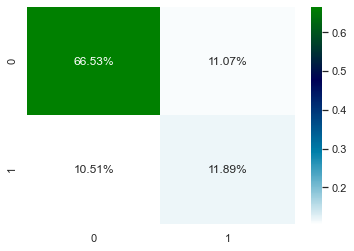

In [47]:
sns.heatmap(confu_m/np.sum(confu_m), annot=True, 
            fmt='.2%', cmap='ocean_r')

## 3. Random Forest Classification Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
t0=time.time()
rantree=RandomForestClassifier(random_state=0)
rantree.fit(X_train,y_train)
y_predc=rantree.predict(X_test)
Random_Forest = accuracy_score(y_test,y_pred)
RF_time = time.time()-t0

E:\anaconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


### Calculating the Accuracy and time taken score of RF

In [49]:
print('Random Tree Accuracy :',Random_Forest)
print('Random Tree Time taken :' ,RF_time)

Random Tree Accuracy : 0.8377931713492036
Random Tree Time taken : 30.64108419418335


In [50]:
confu_mx= confusion_matrix(y_test, y_predc) 
confu_mx

array([[21066,  1001],
       [ 3081,  3291]], dtype=int64)

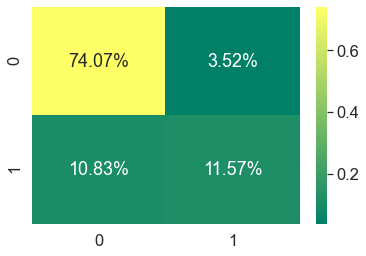

In [55]:
sns.heatmap(confu_mx/np.sum(confu_mx), annot=True, 
            fmt='.2%', cmap='summer')

### Comparing the models and pick best one to apply 

- comparing on the basis of accuracy
- comparing on the basis of time

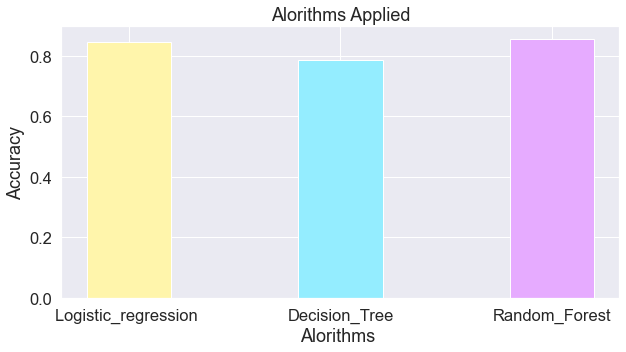

In [52]:
sns.set(font_scale=1.5)
data = {'Logistic_regression ':0.843569787613109, 'Decision_Tree': 0.7851985559566786, 'Random_Forest':0.8545173238314032} 
score = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(score, values, color =['#fff5ab','#94edff','#e6abff'],  
        width = 0.4) 
  
plt.xlabel("Alorithms ") 
plt.ylabel("Accuracy") 
plt.title("Alorithms Applied") 
plt.show()

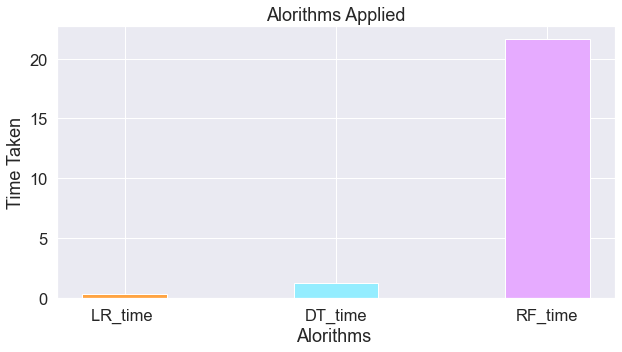

In [53]:
sns.set(font_scale=1.5)
data = {'LR_time ':0.33309316635131836, 'DT_time': 1.2237663269042969, 'RF_time': 21.629181385040283} 
score = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 
  
# creating the bar plot 
plt.bar(score, values, color =['#ffa442','#94edff','#e6abff'],  
        width = 0.4) 
  
plt.xlabel("Alorithms ") 
plt.ylabel("Time Taken") 
plt.title("Alorithms Applied") 
plt.show()

## Observation
- Analysis shows both Logical regressor and Random forest regressor have accuracy of 84%. But performance wise Logical regressor is better since it took only 1.4 Seconds.

<h1 align='center'>            THE END </h1>